## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#Apply a fix to the statsmodels library
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

## Load the data

In [2]:
raw_data = pd.read_csv('2.02. Binary predictors.csv')
raw_data

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [3]:
# Replace all No entries with 0, and all Yes entries with 1
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})
data['Gender'] = data['Gender'].map({'Female': 1, 'Male': 0})
data

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [4]:
data.shape

(168, 3)

## Understanding each feature one by one

## SAT VS admission

In [6]:
# Create the dependent and independent variables
y = data['Admitted']
x1 = data['SAT']

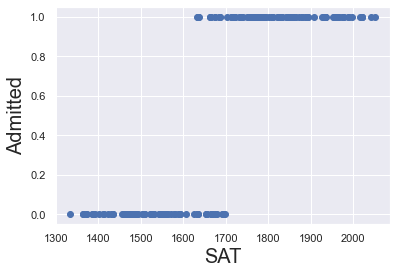

In [7]:
# Create a scatter plot of x1 (SAT, no constant) and y (Admitted)
plt.scatter(x1,y, color='C0')
# Don't forget to label your axes!
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

### Plot with a regression line

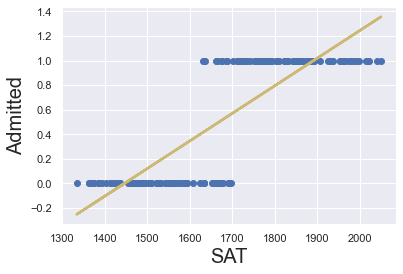

In [8]:
# Create a linear regression on the data in order to estimate the coefficients and be able to plot a regression line
# The data is not linear, so the linear regression doesn't make much sense
x = sm.add_constant(x1)
# I'll call it reg_lin, instead of reg, as we will be dealing with logistic regressions later on
reg_lin = sm.OLS(y,x)
# I'll segment it into regression and fitted regression (results) as I can use the results as an object for some operations
results_lin = reg_lin.fit()

# Create a scatter plot
plt.scatter(x1,y,color = 'C0')
# Plot the regression line. The coefficients are coming from results_lin.params
y_hat = x1*results_lin.params[1]+results_lin.params[0]
plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


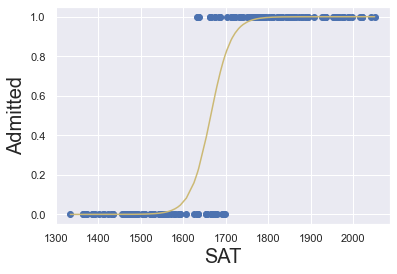

In [9]:
# Creating a logit regression 
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [10]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.7992
Time:                        23:43:32   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## Gender VS admission

In [12]:
y = data['Admitted']
x1 = data['Gender']

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


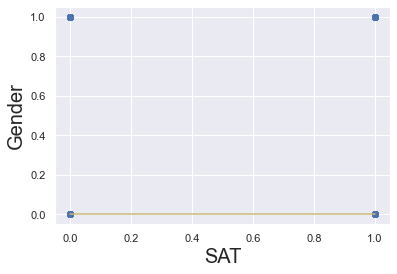

In [13]:
# Creating a logit regression 
reg_log = sm.Logit(y,x)
# Fitting the regression
results_log = reg_log.fit()

# Creating a logit function, depending on the input and coefficients
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

# Sorting the y and x, so we can plot the curve
f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))
plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Gender', fontsize = 20)
# Plotting the curve
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [14]:
results_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.7992
Time:                        23:43:55   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

## SAT, Gender VS admission

## Declare the dependent and the independent variables

In [15]:
y = data['Admitted']
x1 = data[['SAT','Gender']]

## Regression

In [16]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()
results_log.summary()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.8249
Time:                        23:44:10   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [17]:
np.exp(1.9449)

6.992932526814459

In [18]:
# This is a method to change the formatting of np arrays
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
# Should you want to go back to the default formatting, uncomment and execute the line below
#np.set_printoptions(formatter=None)
results_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [19]:
# An array containing the TRUE (actual) values
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [20]:
# A prediction table (confusion matrix) showing the 
results_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [21]:
# Some neat formatting to read the table (better when seeing it for the first time)
cm_df = pd.DataFrame(results_log.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [22]:
# Create an array (so it is easier to calculate the accuracy)
cm = np.array(cm_df)
# Calculate the accuracy of the model
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.9464285714285714

## Testing the model and assessing its accuracy

In [23]:
# Load the test dataset
test = pd.read_csv('2.03. Test dataset.csv')
test

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male
5,1556,Yes,Female
6,1731,Yes,Female
7,1809,Yes,Female
8,1930,Yes,Female
9,1708,Yes,Male


In [24]:
# Map the test data as you did with the train data
test['Admitted'] = test['Admitted'].map({'Yes': 1, 'No': 0})
test['Gender'] = test['Gender'].map({'Female': 1, 'Male': 0})
test

,SAT,Admitted,Gender
0,1323,0,0
1,1725,1,1
2,1762,1,1
3,1777,1,0
4,1665,0,0
5,1556,1,1
6,1731,1,1
7,1809,1,1
8,1930,1,1
9,1708,1,0


In [25]:
# Check how the inputs should look like
x

,const,SAT,Gender
0,1.0,1363,0
1,1.0,1792,1
2,1.0,1954,1
3,1.0,1653,0
4,1.0,1593,0
...,...,...,...
163,1.0,1722,1
164,1.0,1750,0
165,1.0,1555,0
166,1.0,1524,0


In [26]:
# Get the actual values (true valies ; targets)
test_actual = test['Admitted']
# Prepare the test data to be predicted
test_data = test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data

,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [27]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and the accuracy
        return cm, accuracy

In [28]:
# Create a confusion matrix with the test data
cm = confusion_matrix(test_data,test_actual,results_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]),
 0.8947368421052632)

In [29]:
# Format for easier understanding (not needed later on)
cm_df = pd.DataFrame(cm[0])
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [30]:
# Check the missclassification rate
# Note that Accuracy + Missclassification rate = 1 = 100%
print ('Missclassification rate: '+str((1+1)/19))

Missclassification rate: 0.10526315789473684
